In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from IPython.display import display
from gensim.corpora import Dictionary
from gensim.models import ldamodel

In [3]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#### Import Dataset

In [4]:
# Tweets without duplicates
df = pd.read_csv('..\master_corpus(36-51)_no_duplicate.csv')

c:\Users\Ivory-UALR\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
corpus_list_master = ([list(x) for x in df.fillna('').values])

In [6]:
corpus_list_master

[['thank',
  'service',
  'thank',
  'join',
  'rank',
  'fight',
  'keep',
  'freedom',
  'vote',
  'keep',
  'honest',
  'petition',
  'government',
  'undue',
  'burden',
  'public',
  'forum',
  'twitter',
  'apply',
  'open',
  'social_media',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['alien',
  'question',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['half',
  'people',
  'think',
  'save',
  'operation',
  'get',
  'update',
  'stay_tune',
  'marching_order',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['god_bless',
  'wood',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['late',
  'sylvie',
  'laflamme',
  'journal',
  'thank',
  '',
 

#### Training a Model with the Corpus

In [7]:
dictionary = Dictionary(corpus_list_master)
corpus = [dictionary.doc2bow(text) for text in corpus_list_master]

import numpy
numpy.random.seed(1) # setting random seed to get the same results each time.

from gensim.models import ldamodel
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, minimum_probability=1e-8)

2022-05-12 10:17:54,024 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-05-12 10:17:54,178 : INFO : adding document #10000 to Dictionary(8157 unique tokens: ['', 'apply', 'burden', 'fight', 'forum']...)
2022-05-12 10:17:54,318 : INFO : adding document #20000 to Dictionary(11455 unique tokens: ['', 'apply', 'burden', 'fight', 'forum']...)
2022-05-12 10:17:54,463 : INFO : adding document #30000 to Dictionary(13841 unique tokens: ['', 'apply', 'burden', 'fight', 'forum']...)
2022-05-12 10:17:54,608 : INFO : adding document #40000 to Dictionary(15705 unique tokens: ['', 'apply', 'burden', 'fight', 'forum']...)
2022-05-12 10:17:54,756 : INFO : adding document #50000 to Dictionary(17318 unique tokens: ['', 'apply', 'burden', 'fight', 'forum']...)
2022-05-12 10:17:54,896 : INFO : adding document #60000 to Dictionary(18817 unique tokens: ['', 'apply', 'burden', 'fight', 'forum']...)
2022-05-12 10:17:55,047 : INFO : adding document #70000 to Dictionary(20154 unique tokens: [

In [8]:
model.show_topics()

[(14,
  '0.000*"" + 0.000*"extoionist" + 0.000*"hurl" + 0.000*"evehe" + 0.000*"gagop" + 0.000*"declass" + 0.000*"horribly" + 0.000*"plagiarist" + 0.000*"molester" + 0.000*"wolf_sheep"'),
 (13,
  '0.100*"expose" + 0.096*"result" + 0.053*"next" + 0.050*"lead" + 0.048*"money" + 0.038*"expect" + 0.037*"hate" + 0.033*"complete" + 0.030*"datum" + 0.029*"one"'),
 (12,
  '0.904*"" + 0.002*"election" + 0.001*"get" + 0.001*"thank" + 0.001*"fraud" + 0.001*"steal" + 0.001*"need" + 0.001*"president" + 0.001*"know" + 0.001*"rally"'),
 (4,
  '0.595*"vote" + 0.100*"legal" + 0.054*"recount" + 0.048*"dead" + 0.043*"illegal" + 0.040*"fraudulent" + 0.008*"toss" + 0.006*"want" + 0.004*"win" + 0.004*"get"'),
 (8,
  '0.000*"" + 0.000*"steal" + 0.000*"examine" + 0.000*"philly" + 0.000*"format" + 0.000*"experience" + 0.000*"month" + 0.000*"datum" + 0.000*"need" + 0.000*"drive"'),
 (9,
  '0.150*"campaign" + 0.146*"race" + 0.066*"push" + 0.061*"top" + 0.044*"every_single" + 0.040*"position" + 0.029*"lack" + 0.01

In [9]:
topic1, topic2, topic3, topic4, topic5, topic6, topic7, topic8, topic9, topic10 = model.show_topics()

##### How similar are our topics from our model

In [10]:
def parse_topic_string(topic):
    # takes the string returned by model.show_topics()
    # split on strings to get topics and the probabilities
    topic = topic.split('+')
    # list to store topic bows
    topic_bow = []
    for word in topic:
        # split probability and word
        prob, word = word.split('*')
        # get rid of spaces and quote marks
        word = word.replace(" ","").replace('"', '')
        # convert to word_type
        word = model.id2word.doc2bow([word])[0][0]
        topic_bow.append((word, float(prob)))
    return topic_bow

In [11]:
topic1_distribution = parse_topic_string(topic1[1])
topic2_distribution = parse_topic_string(topic2[1])
topic3_distribution = parse_topic_string(topic3[1])
topic4_distribution = parse_topic_string(topic4[1])
topic5_distribution = parse_topic_string(topic5[1])
topic6_distribution = parse_topic_string(topic6[1])
topic7_distribution = parse_topic_string(topic7[1])
topic8_distribution = parse_topic_string(topic8[1])
topic9_distribution = parse_topic_string(topic9[1])
topic10_distribution = parse_topic_string(topic10[1])

In [12]:
topic_dist_list = [topic1_distribution, topic2_distribution, topic3_distribution, topic4_distribution, topic5_distribution, topic6_distribution, topic7_distribution, topic8_distribution, topic9_distribution, topic10_distribution]

In [13]:
from gensim.matutils import hellinger

hellinger_topic_dist_scores = []

for i in range(len(topic_dist_list) - 1):
    mark = i + 1
    if not (mark <= len(topic_dist_list)):
        break
    else:
        score = hellinger(topic_dist_list[i], topic_dist_list[mark])
        hellinger_topic_dist_scores.append(score)

In [14]:
print(hellinger_topic_dist_scores)

[0.8555699854482975, 0.73348483283569, 0.5069516742254631, 0.0, 0.0, 0.33541019662496846, 0.6336402764976355, 0.5375872022286245, 0.0]


#### Computing the BOW and Probability distributions

In [15]:
path = '..\prob_dist (no_duplicates)\corpus_docs'
csv_files = glob.glob(path + "\*.csv")

df_list = (pd.read_csv(file) for file in csv_files)

dataframes_list = []
for file in range(len(csv_files)):
    temp_df = pd.read_csv(csv_files[file])
    dataframes_list.append(temp_df)
    
corpus_list = []
for df in dataframes_list:
     corpus_list.append([list(x) for x in df.fillna('').values])
     
corpus_list[0]

[['agree',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['home',
  'thank',
  'vote',
  'voter',
  'judge',
  'cancel',
  'vote',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['thing',
  'test',
  'run',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['thank',
  'former',
  'campaign',
  'worker',
  'year',
  'glad',
  'bring',
  'experience',
  'help',
  'great',
  'potus',
  'volunteer',
  'election',
  'day',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['conservative',
  'need',
  'sign',
  'poll',
  'worker',
  'state',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['home',
  'thank',
  'vote',
  'voter',
  'judg',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['ridiculous',
  'little',
  'baby',
  'son',
  

In [16]:
corpus36, corpus37, corpus38, corpus39, corpus40, corpus41, corpus42, corpus43, corpus44, corpus45, corpus46, corpus47, corpus48, corpus49, corpus50, corpus51 = corpus_list[:]

In [17]:
doc_36 = corpus36[6]
doc_37 = corpus37[3]
doc_38 = corpus38[10]
doc_39 = corpus39[6]
doc_40 = corpus40[0]
doc_41 = corpus41[0]
doc_42 = corpus42[6]
doc_43 = corpus43[10]
doc_44 = corpus44[1]
doc_45 = corpus45[6]
doc_46 = corpus46[4]
doc_47 = corpus47[1]
doc_48 = corpus48[1]
doc_49 = corpus49[2]
doc_50 = corpus50[2]
doc_51 = corpus51[2]


# now let's make these into a bag of words format
bow_36 = model.id2word.doc2bow(doc_36)   
bow_37 = model.id2word.doc2bow(doc_37)   
bow_38 = model.id2word.doc2bow(doc_38)
bow_39 = model.id2word.doc2bow(doc_39)   
bow_40 = model.id2word.doc2bow(doc_40)   
bow_41 = model.id2word.doc2bow(doc_41)
bow_42 = model.id2word.doc2bow(doc_42)

bow_43 = model.id2word.doc2bow(doc_43)   
bow_44 = model.id2word.doc2bow(doc_44)   
bow_45 = model.id2word.doc2bow(doc_45)
bow_46 = model.id2word.doc2bow(doc_46)   
bow_47 = model.id2word.doc2bow(doc_47)   
bow_48 = model.id2word.doc2bow(doc_48)
bow_49 = model.id2word.doc2bow(doc_49)   

bow_50 = model.id2word.doc2bow(doc_50)
bow_51 = model.id2word.doc2bow(doc_51)

# we can now get the LDA topic distributions for these
lda_bow_36 = model[bow_36]
lda_bow_37 = model[bow_37]
lda_bow_38 = model[bow_38]
lda_bow_39 = model[bow_39]
lda_bow_40 = model[bow_40]
lda_bow_41 = model[bow_41]
lda_bow_42 = model[bow_42]

lda_bow_43 = model[bow_43]
lda_bow_44 = model[bow_44]
lda_bow_45 = model[bow_45]
lda_bow_46 = model[bow_46]
lda_bow_47 = model[bow_47]
lda_bow_48 = model[bow_48]
lda_bow_49 = model[bow_49]

lda_bow_50 = model[bow_50]
lda_bow_51 = model[bow_51]

lda_bows = [lda_bow_36, lda_bow_37, lda_bow_38,  lda_bow_39, lda_bow_40, lda_bow_41, lda_bow_42, lda_bow_43, lda_bow_44, lda_bow_45, lda_bow_46, lda_bow_47, lda_bow_48, lda_bow_49, lda_bow_50, lda_bow_51]


#### Hellinger Scores

In [18]:
from gensim.matutils import hellinger

hellinger_master_scores = []

# Loop through the lda_bows and compute Hellinger Scores

for i in range(len(lda_bows) - 1):
    mark = i + 1
    if not (mark <= len(lda_bows)):
        break
    else:
        score = hellinger(lda_bows[i], lda_bows[mark])
        hellinger_master_scores.append(score)

In [19]:
print(hellinger_master_scores)

[0.14276497483811154, 0.15799372777513204, 0.2782642161051366, 0.5495757256081973, 0.019174285963339706, 0.3544419290045981, 0.4015657839549169, 0.4476503953060088, 0.20522346714739514, 0.44537823729321796, 0.47641046055238934, 0.4826454292107596, 0.5613012244541161, 0.2281705592459795, 0.4237472640830107]


In [20]:
weeks = ["36-37", "37-38", "38-39", "39-40", "40-41", "41-42", "42-43", "43-44", "44-45", "45-46", "46-47", "47-48", "48-49", "49-50", "50-51"]
# weeks = ["36", "37", "38", "39", "40", "41", "42", "43", "44", "45", "46", "47", "48", "49", "50"]

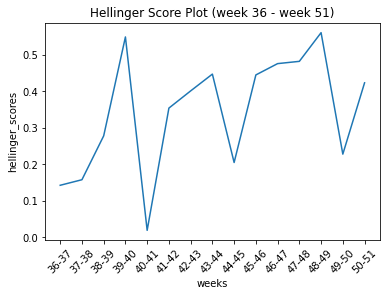

<Figure size 1080x576 with 0 Axes>

In [29]:
# Plot Hellinger scores with Seaborn

df = pd.DataFrame({"weeks": weeks, "hellinger_scores": hellinger_master_scores})

hellinger_plot = sns.lineplot(x="weeks", y="hellinger_scores", data=df)
hellinger_plot.set_title('Hellinger Score Plot (week 36 - week 51)');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize = (15,8))
plt.show()



#### Jensen Shannon Scores

In [22]:
from gensim.matutils import kullback_leibler
import math

# Sample Data - JS(P, Q) = 0.050803
p = [0.36, 0.48, 0.16]
q = [0.30, 0.50, 0.20]


def js_score(p, q):
    num = [i + j for i, j in zip(p, q)]
    for val in num:
        if (type(val) == float):
            p_prob = p
            q_prob = q
        else:
            p_prob = [prob for index, prob in p]
            q_prob = [prob for index, prob in q]
    # find m & z
    m = [x + y for x, y in zip(p_prob, q_prob)]
    z = [1/2 * i for i in m]
    # find the kullback distance between p-z & q-z
    kl_pz = round(kullback_leibler(p_prob, z), 6)
    kl_qz = round(kullback_leibler(q_prob, z), 6)
    # compute js_score
    js_score = math.sqrt((kl_pz + kl_qz) / 2)
    return js_score

In [23]:
js_score(lda_bow_36, lda_bow_37)

0.14214781039467334

In [24]:
# Loop through the lda_bows and compute JS Scores
js_master_scores = []

for i in range(len(lda_bows) - 1):
    mark = i + 1
    if not (mark <= len(lda_bows)):
        break
    else:
        score = js_score(lda_bows[i], lda_bows[mark])
        js_master_scores.append(score)

In [25]:
print(js_master_scores)

[0.14214781039467334, 0.15004332707588164, 0.27316661582265134, 0.4949702011232595, 0.019170289512680815, 0.321158060773819, 0.3629139016350848, 0.40709704002854163, 0.19291708063310517, 0.40422209241950147, 0.43440706716166577, 0.4384136174892381, 0.5054527673284617, 0.22057311712899194, 0.41434405993087436]


In [26]:
weeks = ["36-37", "37-38", "38-39", "39-40", "40-41", "41-42", "42-43", "43-44", "44-45", "45-46", "46-47", "47-48", "48-49", "49-50", "50-51"]
# weeks = ["36", "37", "38", "39", "40", "41", "42", "43", "44", "45", "46", "47", "48", "49", "50"]

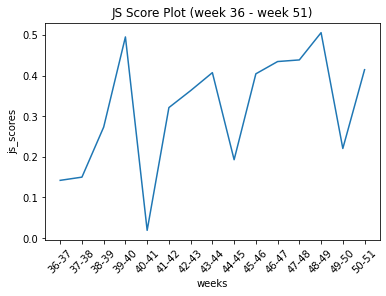

<Figure size 1080x576 with 0 Axes>

In [28]:
# Plot JS scores with Seaborn

df = pd.DataFrame({"weeks": weeks, "js_scores": js_master_scores})

js_plot = sns.lineplot(x="weeks", y="js_scores", data=df)
js_plot.set_title('JS Score Plot (week 36 - week 51)');
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.figure(figsize = (15,8))

plt.show()
